# Regresyon Analizi

Bir tane sonuç değişkenimiz var. (Bağımsız)

Birde bunu açıklamaya yardımcı bağımlı değişkenler var.

Doğrusal Regresyon : 

y = B0 + B1x1 + €1

B0, B1 = katsayılar

€1 = hata oranı

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import scipy 

import statsmodels.stats.api as sms

import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.pyplot import plot
from scipy.stats import shapiro


from scipy import stats

In [5]:
def readData(filename):
        data = pd.read_excel(filename)
        print("First 5 data: \n", data.head())
        print("Last 5 data: \n", data.tail())
        return data

In [14]:
def infofun(data):
    print("Data Info: ",data.info())

In [35]:
def shapiroAllData(df):
    for col in df.columns[:]:           
        if df[col].dtypes != object:
            stat, p = shapiro(df[col])
            alpha = 0.05
        if p > alpha:
            print(col)
            print('Örneklem Normal dağılımdan gelmektedir')
        else:
            print('Örneklem Normal dağılımdan gelmemektedir')
        

In [25]:
def shapiroFun(df, columnName):
    stats, p = shapiro(df[columnName])
    print('Statistics-%.3f, p=%.3f' % (stats,p))
    
    if(p<0.05):
        print("Normal Dağılımdan gelmiyor, Reject h0")

In [39]:
def snsPlot(df,columnName):
    sns.distplot(df[columnName])
    plt.show()

In [46]:
def countPlot(df, columnName):
    sns.countplot(columnName, data=df)

In [52]:
def qqPlot(df, countName):
    sm.qqplot (df[countName], line= "s") 
    pylab.show()

## Veri okuma inceleme

In [77]:
df = readData("hw_data_set.xlsx")

First 5 data: 
    ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_t

In [15]:
infofun(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB
Data Info:  None


In [23]:
df.shape

(6167, 136)

In [24]:
df.describe()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,...,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,...,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.868503,-45.687212,6.850000,7.260000,7.635000,...,-0.003230,10.700000,-11.700000,-39.000000,0.000000,0.323783,0.379894,-15.350354,-36.208094,-37.695273
50%,0.000000,0.000000,50.000000,50.000000,0.000000,49.549766,-2.817298,10.550000,11.040000,11.270000,...,-0.000053,21.300000,0.000000,-22.000000,0.473684,0.495192,0.487078,0.000000,-34.267756,-35.788391
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.504375,28.072613,14.950000,15.040000,14.960000,...,0.003414,38.400000,0.000000,-11.000000,1.000000,0.675730,0.601508,15.385945,35.879524,37.521892
max,76.000000,76.000000,100.000000,100.000000,100.000000,84.821848,81.105847,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,1.000000,1.000000,0.868534,15.768767,37.038694,38.465649


In [25]:
# nul değer olup olmadıgına bakma
df.isnull().values.any()

False

In [26]:
df.dtypes

ind_5          int64
ind_6          int64
ind_8        float64
ind_9        float64
ind_10       float64
              ...   
ind_426      float64
ind_428      float64
20_target    float64
50_target    float64
90_target    float64
Length: 136, dtype: object

## Verideki kategorik değişkenlere bakma

In [27]:
df=df.select_dtypes(include=["object"])
df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [28]:
df.groupby("ind_420").count().tail(1)
df.groupby("ind_422").count().tail(1)

,ind_109,ind_420
ind_422,,
?,1041,1041


### Korelasyona bakma

In [16]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [17]:
df.corr()["20_target"].sort_values(ascending = False)

20_target    1.000000
50_target    0.384076
90_target    0.355950
ind_37       0.089695
ind_332      0.089679
               ...   
ind_51      -0.070911
ind_334     -0.071096
ind_50      -0.071823
ind_70      -0.072131
ind_130     -0.079174
Name: 20_target, Length: 133, dtype: float64

In [18]:
df.corr()['50_target'].sort_values(ascending = False)

50_target    1.000000
90_target    0.940916
20_target    0.384076
ind_412      0.127234
ind_18       0.127057
               ...   
ind_67      -0.069859
ind_330     -0.075589
ind_26      -0.084275
ind_418     -0.101488
ind_324     -0.110802
Name: 50_target, Length: 133, dtype: float64

In [19]:
df.corr()['90_target'].sort_values(ascending = False)

90_target    1.000000
50_target    0.940916
20_target    0.355950
ind_18       0.140877
ind_17       0.129277
               ...   
ind_128     -0.061283
ind_26      -0.086192
ind_330     -0.093811
ind_418     -0.096903
ind_324     -0.103707
Name: 90_target, Length: 133, dtype: float64

3 target değişkenin korelasyon sıralamasına bakarak en büyük değere sahip taget_50 olduğu gözlemlenmiştir.

In [78]:
# bu nedenle 20 ve 90 kaldırıldı

columns = ['20_target', '90_target']
df.drop(columns, inplace=True, axis=1)

In [21]:
# If correlation is greater than 0.90 show the column
corr = df.corr() 

m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.90).any()
raw = corr.loc[m, m]
raw

,ind_8,ind_9,ind_10,ind_14,ind_15,ind_18,ind_25,ind_26,ind_27,ind_28,...,ind_344,ind_352,ind_397,ind_399,ind_412,ind_416,ind_424,ind_426,ind_428,50_target
ind_8,1.000000,-0.374857,0.828650,0.162635,0.139612,-0.012341,-0.054387,-0.114022,-0.186725,0.076141,...,-0.033844,0.012419,-0.118371,0.481655,0.275687,-0.277258,0.144795,0.593799,0.445427,0.006984
ind_9,-0.374857,1.000000,-0.829576,0.238938,0.240048,-0.127658,0.191755,-0.036398,0.180808,-0.100826,...,0.082468,-0.042354,0.102421,-0.482790,-0.276882,0.349318,-0.173139,-0.631961,-0.450719,-0.004053
ind_10,0.828650,-0.829576,1.000000,-0.046312,-0.060849,0.069646,-0.148539,-0.046700,-0.221638,0.106739,...,-0.070178,0.033053,-0.133138,0.581613,0.333229,-0.377913,0.191752,0.739227,0.540428,0.006654
ind_14,0.162635,0.238938,-0.046312,1.000000,0.839642,0.238631,0.523360,-0.485883,0.072443,-0.012543,...,-0.041509,-0.008664,-0.026387,-0.065571,-0.001524,0.037185,-0.011056,-0.066201,0.021970,0.072728
ind_15,0.139612,0.240048,-0.060849,0.839642,1.000000,0.321320,0.650224,-0.620696,0.071449,-0.012267,...,-0.041526,-0.005343,0.007027,-0.077879,-0.011403,0.036179,-0.010548,-0.066437,0.016318,0.084561
ind_18,-0.012341,-0.127658,0.069646,0.238631,0.321320,1.000000,0.350490,-0.361721,0.008946,0.030568,...,-0.058657,0.034298,0.010351,0.051626,-0.018460,-0.144709,0.033683,0.097413,0.089473,0.127057
ind_25,-0.054387,0.191755,-0.148539,0.523360,0.650224,0.350490,1.000000,-0.602196,0.493740,-0.027858,...,-0.040793,0.007308,0.050872,-0.315469,-0.057298,0.056578,-0.028571,-0.182310,-0.022500,0.059280
ind_26,-0.114022,-0.036398,-0.046700,-0.485883,-0.620696,-0.361721,-0.602196,1.000000,0.396923,0.005659,...,0.048495,-0.024326,-0.028367,-0.139486,0.024041,0.048521,0.007909,-0.084374,0.050332,-0.084275
ind_27,-0.186725,0.180808,-0.221638,0.072443,0.071449,0.008946,0.493740,0.396923,1.000000,-0.025866,...,0.005918,-0.018089,0.027587,-0.514626,-0.039687,0.117902,-0.024231,-0.301499,0.028963,-0.023645
ind_28,0.076141,-0.100826,0.106739,-0.012543,-0.012267,0.030568,-0.027858,0.005659,-0.025866,1.000000,...,0.011397,0.012178,-0.446485,-0.095818,0.004400,-0.102179,0.569942,0.197572,0.102867,-0.002270


In [79]:
column_list=[]
for i in raw:
    if i!='50_target':
        column_list.append(i)

In [80]:
df.drop(column_list, inplace=True, axis=1)

In [81]:
df.shape

(6167, 85)

### 50_target ve corelasyonu  0.90'dan küçük olanlar kaldı

In [42]:
df.info

<bound method DataFrame.info of       ind_5  ind_6     ind_12     ind_13  ind_16     ind_17  ind_19  ind_20  \
0        19     17  72.363515  60.808814   11.73  12.060000       2      15   
1        24     19  74.275883  64.366798   12.22  11.326667       0      11   
2        30     24  75.140402  65.915803   12.28  10.973333       5      15   
3        37     30  76.677846  68.584234   12.61  10.426667      11      18   
4        41     37  81.603007  76.455495   14.25  11.406667      13      23   
...     ...    ...        ...        ...     ...        ...     ...     ...   
6162     27     31  60.010531  32.362582   13.66  15.100000      13      31   
6163     22     27  60.209998  32.914628   11.79  14.753333      11      30   
6164     19     22  64.329611  43.550592   10.30  14.613333      11      29   
6165     19     19  69.027764  54.130755   10.55  13.606667       9      27   
6166     19     19  65.157180  45.524973    9.68  13.020000       6      23   

      ind_21  ind_2

kategorik columnlara ve değer sayılarına bakma

In [82]:
df.groupby("ind_109").count()

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_420,ind_422,50_target
ind_109,,,,,,,,,,,,,,,,,,,,,
GREEN,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,...,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
RED,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035,...,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035


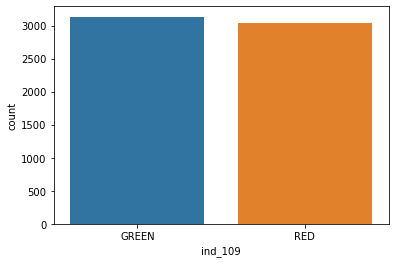

In [47]:
countPlot(df, "ind_109")

In [48]:
import statsmodels.stats.api as sms
from scipy.stats import levene
from scipy.stats import shapiro
from scipy import stats

# İstatistik

##### Tüm veriler normal dağılımdan gelmemektedir. 

In [36]:
shapiroAllData(df)

Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal dağılımdan gelmemektedir
Örneklem Normal 

Tek tek bakma

In [37]:
shapiroFun(df, "50_target")

Statistics-0.692, p=0.000
Normal Dağılımdan gelmiyor, Reject h0


In [38]:
shapiroFun(df, "ind_6")

Statistics-0.978, p=0.000
Normal Dağılımdan gelmiyor, Reject h0


## Data Visualization

##### Targets

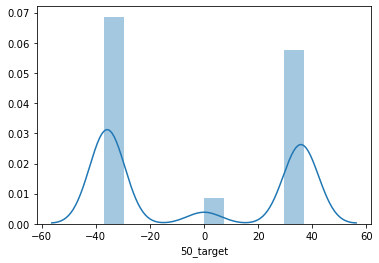

In [41]:
snsPlot(df,"50_target")

##### QQ Plot

In [51]:
import statsmodels.api as sm

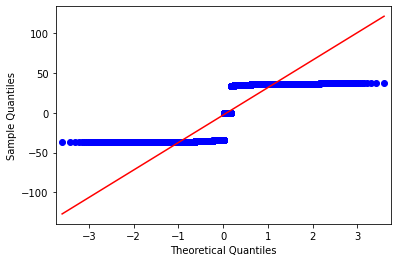

In [53]:
qqPlot(df,"50_target")

In [ ]:
qqPlot(df,"20_target")
qqPlot(df,"90_target")

##  Regression

In [54]:
df.head(2)

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_420,ind_422,50_target
0,19,17,72.363515,60.808814,11.73,12.060000,2,15,13,1,...,0.045130,-0.044678,-44,-23,-27,2.0,-54,-152,-353,35.625252
1,24,19,74.275883,64.366798,12.22,11.326667,0,11,11,1,...,0.035314,-0.034961,-48,-16,-31,0.8,-60,-158,-359,35.643013


df["50_target"] = df["50_target"].replace("?", df["50_target"].mean)

df["ind_10"] = df["ind_10"].replace("?", df["ind_10"].mean)

In [56]:
df.head(1)

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_420,ind_422,50_target
0,19,17,72.363515,60.808814,11.73,12.06,2,15,13,1,...,0.04513,-0.044678,-44,-23,-27,2.0,-54,-152,-353,35.625252


In [83]:
import statsmodels.api as sm
X = df[["ind_12"]]
X[0:5]
X=sm.add_constant(X) # sabit bir değer atıyor , b0 olarak
X[0:5]

y = df["50_target"]
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [58]:
df["50_target"]

0       35.625252
1       35.643013
2       35.651301
3        0.000000
4      -35.727079
          ...    
6162   -34.536532
6163   -34.537716
6164   -34.563173
6165   -34.597806
6166   -34.583301
Name: 50_target, Length: 6167, dtype: float64

In [59]:
lm = sm.OLS(y.astype(float),X.astype(float))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.74
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           1.52e-05
Time:                        20:10:28   Log-Likelihood:                -30589.
No. Observations:                6167   AIC:                         6.118e+04
Df Residuals:                    6165   BIC:                         6.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6239      1.836     -5.785      0.000     -14.224      -7.024
ind_12         0.1559      0.036      4.329      0.000       0.085       0.227
==============================================================================
Omnibus:                    22829.072   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              947.150
Skew:                           0.157   Prob(JB):                    2.13e-206
Kurtosis:                       1.106   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.30,
                                               random_state=42)

In [88]:
lm = sm.OLS(y.astype(float),X.astype(float))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.74
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           1.52e-05
Time:                        20:16:38   Log-Likelihood:                -30589.
No. Observations:                6167   AIC:                         6.118e+04
Df Residuals:                    6165   BIC:                         6.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6239      1.836     -5.785      0.000     -14.224      -7.024
ind_12         0.1559      0.036      4.329      0.000       0.085       0.227
==============================================================================
Omnibus:                    22829.072   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              947.150
Skew:                           0.157   Prob(JB):                    2.13e-206
Kurtosis:                       1.106   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Reg

In [89]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
model = reg.fit(X,y)

In [90]:
X_train.shape

(4316, 2)

In [91]:
X_test.shape

(1851, 2)

In [92]:
y_train.shape

(4316,)

In [93]:
training = df.copy()
training.shape

(6167, 85)

In [94]:
lm = sm.OLS(y_train , X_train)
model = lm.fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.39
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           3.10e-05
Time:                        20:16:49   Log-Likelihood:                -21404.
No. Observations:                4316   AIC:                         4.281e+04
Df Residuals:                    4314   BIC:                         4.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0639      2.200     -5.483      0.000     -16.378      -7.750
ind_12         0.1803      0.043      4.171      0.000       0.096       0.265
==============================================================================
Omnibus:                    16182.493   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.783
Skew:                           0.170   Prob(JB):                    3.26e-144
Kurtosis:                       1.114   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### # nasıl bir error dağılımı var hesaplamamız lazım

In [96]:
influence = model.get_influence()
influence

In [97]:
resid_student = influence.resid_studentized_external

import statsmodels.formula.api as smf

lm = smf.ols("ind_10 ~ 50_target",df)

In [98]:
model =lm.fit()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.39
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           3.10e-05
Time:                        20:17:20   Log-Likelihood:                -21404.
No. Observations:                4316   AIC:                         4.281e+04
Df Residuals:                    4314   BIC:                         4.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0639      2.200     -5.483      0.000     -16.378      -7.750
ind_12         0.1803      0.043      4.171      0.000       0.096       0.265
==============================================================================
Omnibus:                    16182.493   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.783
Skew:                           0.170   Prob(JB):                    3.26e-144
Kurtosis:                       1.114   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))

In [102]:
df.groupby("ind_420").count()

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_392,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_422,50_target
ind_420,,,,,,,,,,,,,,,,,,,,,
-349,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-346,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-340,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
-330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-327,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
290,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
291,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [103]:
df['ind_420'] = [ 'A' if i==1 else 'B' for i in df['ind_420']]

In [104]:
df.groupby("ind_420").count()

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_392,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_422,50_target
ind_420,,,,,,,,,,,,,,,,,,,,,
A,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
B,6148,6148,6148,6148,6148,6148,6148,6148,6148,6148,...,6148,6148,6148,6148,6148,6148,6148,6148,6148,6148


sns.pairplot(df['ind_5'],df['ind_6'],df['ind_12'],df['ind_13'], kind="reg") #fit linear regression models to the scatter plots:
sns.pairplot(df['ind_5'],df['ind_6'],df['ind_12'],df['ind_13'], kind="scatter")

sns.jointplot(x="50_target", y="ind_12", data=df, kind="reg")

In [105]:
# remove this column

removeColumn = ['ind_18',]

In [106]:
df = df.drop(df[raw], axis=1)

In [108]:
df.head()

""
0
1
2
3
4


### Correlation

In [109]:
# If correlation is greater than 0.75 remove the column


m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.75).any()
raw = corr.loc[m, m]
raw

,ind_18,ind_25,ind_26,ind_27,ind_28,ind_40,ind_88,ind_134,ind_172,ind_176,...,ind_309,ind_310,ind_315,ind_321,ind_324,ind_327,ind_340,ind_412,ind_416,50_target
ind_18,1.000000,0.350490,-0.361721,0.008946,0.030568,-0.061376,-0.089062,0.019204,0.009433,0.030648,...,-0.046281,0.296947,-0.266317,0.134862,-0.257567,0.173309,-0.110680,-0.018460,-0.144709,0.127057
ind_25,0.350490,1.000000,-0.602196,0.493740,-0.027858,0.194109,0.162897,-0.017418,0.006883,-0.228356,...,0.014198,0.063215,-0.069772,-0.012491,-0.049874,-0.049118,-0.043787,-0.057298,0.056578,0.059280
ind_26,-0.361721,-0.602196,1.000000,0.396923,0.005659,0.002987,-0.149388,0.057816,0.090455,-0.004954,...,0.050497,-0.087831,0.095882,0.013141,0.170527,0.056796,0.033297,0.024041,0.048521,-0.084275
ind_27,0.008946,0.493740,0.396923,1.000000,-0.025866,0.226422,0.024558,0.042951,0.106452,-0.267932,...,0.071321,-0.022993,0.024218,-0.000044,0.128401,0.005404,-0.014065,-0.039687,0.117902,-0.023645
ind_28,0.030568,-0.027858,0.005659,-0.025866,1.000000,-0.239159,-0.008667,0.557441,0.034612,-0.137806,...,-0.007085,0.006815,-0.003084,-0.001016,-0.010208,0.004747,-0.004979,0.004400,-0.102179,-0.002270
ind_40,-0.061376,0.194109,0.002987,0.226422,-0.239159,1.000000,0.023143,-0.301153,-0.139126,-0.119954,...,0.115271,-0.041551,0.015586,0.027175,0.054142,0.032825,-0.071768,-0.057675,0.210117,-0.004267
ind_88,-0.089062,0.162897,-0.149388,0.024558,-0.008667,0.023143,1.000000,0.139806,-0.019806,-0.022150,...,0.021954,-0.006624,-0.007441,0.005344,0.065680,-0.018863,0.002428,0.020811,0.027641,0.001783
ind_134,0.019204,-0.017418,0.057816,0.042951,0.557441,-0.301153,0.139806,1.000000,0.098985,-0.152020,...,0.016704,0.008836,-0.005625,0.010601,-0.012096,0.005616,-0.007400,0.029473,-0.116577,0.005320
ind_172,0.009433,0.006883,0.090455,0.106452,0.034612,-0.139126,-0.019806,0.098985,1.000000,-0.174028,...,0.025157,0.002060,0.007668,-0.048348,0.102600,-0.046235,-0.013892,-0.008072,0.021236,0.007046
ind_176,0.030648,-0.228356,-0.004954,-0.267932,-0.137806,-0.119954,-0.022150,-0.152020,-0.174028,1.000000,...,-0.051918,0.023299,0.012203,0.039419,-0.058948,0.016927,0.032180,0.040570,-0.135972,-0.004327


In [111]:
corr = df.corr()

In [113]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]